In [9]:
import sys
import numpy as np
import os
import random
import winsound
import matplotlib.pyplot as plt
from electron_rigol_class import *
from electron_RS_class import *
try:
    import TimeTagger
except:
    print ("Time Tagger lib is not in the search path.")
    pyversion = sys.version_info
    from winreg import ConnectRegistry, OpenKey, HKEY_LOCAL_MACHINE, QueryValueEx
    registry_path = "SOFTWARE\\Python\\PythonCore\\" + str(pyversion.major) + "." + str(pyversion.minor) + "\\PythonPath\\Time Tagger"
    reg = ConnectRegistry(None, HKEY_LOCAL_MACHINE)
    key = OpenKey(reg, registry_path) 
    module_path = QueryValueEx(key,'')[0]
    print ("adding " + module_path)
    sys.path.append(module_path)
    
from TimeTagger import createTimeTagger, Counter, Countrate, Histogram, LOW, HIGH, freeTimeTagger, scanTimeTagger, ConstantFractionDiscriminator
from time import sleep
from pylab import *
from pathlib import Path

###############################################################
###############################################################
save_date = '2020_05_28'
date = '20200528'
###############################################################
###############################################################

data_folder = r'C:\Users\cm467\Documents\Jupyter'
save_folder = data_folder + '/' + save_date + '/' + 'loading'

if os.path.exists(save_folder) == False:
    Path(save_folder).mkdir(parents=True, exist_ok=False)
    os.chdir(save_folder)
else:
    os.chdir(save_folder)

roi = []
variable = []
################################################################
################################################################

# print (scanTimeTagger())

# create a timetagger instance
tagger = createTimeTagger()
# print (scanTimeTagger())
tagger.reset()
trigger = 0.5
tagger.setTriggerLevel(2, trigger)
tagger.setDeadtime(2, 100000)
# Ch2_CFD = ConstantFractionDiscriminator(tagger,[2], search_window = 10000)
# CFD_channels = Ch2_CFD.getChannels()

# Rigol
sampling_time = 100.E-9
rigol =  rigol(sampling_time)




###############################
# Set up experiment: variable parameters
###############################
U2 = -0.7
Prf = +5.0
Ex = -0.01
Ey = 0.0
Ez=-0.15
U1=0.2
# parameters for the Rigol waveforms


pulse_width_loading = np.arange(50, 1050, 50) * 1.E-6
wait_time = 1.E-6


pulse_delay_ao = sampling_time
pulse_width_ej = 20.E-9
pulse_delay_ej = 2.E-9 

exp_cycles = 2E4  # how many experiment repetitions
################################
for pulse_width_ao in pulse_width_loading:
# for wait_time in wait_times:

    # program and switch on Rigol, returns repetition period in s
    cycle_duration,wait_time_corr = rigol.run(pulse_width_ao, pulse_delay_ao, pulse_width_ej, pulse_delay_ej, wait_time)

#     print (cycle_duration)
    filename = date + '_loading_U2_' + str("{:.2f}".format(U2))+'_U1_' + str("{:.2f}".format(U1)) +'_Ex' + str("{:.2f}".format(Ex)) +'_Ez' + str("{:.2f}".format(Ez)) + '_Prf' + str("{:.2f}".format(Prf)) +'dBm_Tload' + str("{:n}".format(pulse_width_ao/1E-6)) + 'us_Tej' \
    + str("{:n}".format(pulse_width_ej/1E-9)) + 'ns_wait' + str("{:n}".format(wait_time_corr/1E-6)) + 'us_reps'+ \
    str("{:.1e}".format(exp_cycles)) +'_trigger' + str("{:.1f}".format(trigger))+ '_+300V.txt'
#     print (filename)
    ###############################
    # set up time tagger histogram and take data
    bwidth = 500
#     print (cycle_duration/binwidth*1E12 - 100)
    n_bin = int(500*(1000/bwidth))
    histo = Histogram(tagger, click_channel = 2, start_channel = 1, binwidth = bwidth, n_bins = n_bin)
#     histo = Histogram(tagger, click_channel = CFD_channels[0], start_channel = 1, binwidth = bwidth, n_bins = n_bin)
    tagger.sync()
    histo.clear()
#     print (cycle_duration * exp_cycles)
    sleep(cycle_duration * exp_cycles)
    data = histo.getData()
    
    ###############################
    roi_start = int(80 * 1000/bwidth)
    roi_stop = int(130 *1000/bwidth)
    # save data
    x_data = np.arange(0, n_bin) * bwidth/1000
#     file_data = np.array([x_data[0:1000], data[0:1000]])
    file_data = np.array([x_data, data])
    file_data = file_data.T
#     print (file_data)
    np.savetxt(filename, file_data, delimiter=',')
#     print (wait_time*1E3, np.sum(data[roi_start:roi_stop]))
#     print (freq_trapfreq/1E6, np.sum(data[roi_start:roi_stop]))
    print (pulse_width_ao, np.sum(data[roi_start:roi_stop]))
    roi = np.append(roi, np.sum(data[roi_start:roi_stop]))

    variable = np.append(variable, pulse_width_ao)


filename_roi = date + '_loading_ROI_U2_' + str("{:.2f}".format(U2))+'_U1_' + str("{:.2f}".format(U1)) +'_Ex' + str("{:.2f}".format(Ex)) +'_Ez' + str("{:.2f}".format(Ez))+'_Prf' + str("{:.2f}".format(Prf)) +'dBm_Tej' \
    + str("{:n}".format(pulse_width_ej/1E-9)) + 'ns_wait' + str("{:n}".format(wait_time_corr/1E-6)) + 'us' +   '_reps'+ \
    str("{:.1e}".format(exp_cycles)) + '_trigger' + str("{:.1f}".format(trigger))+'_+300V.txt'
ROI_data = np.array([variable,roi])
ROI_data = ROI_data.T 
np.savetxt(filename_roi,ROI_data,delimiter=',')

os.chdir(data_folder)
frequency = 440  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)


4.9999999999999996e-05 4673
9.999999999999999e-05 8248
0.00015 11111
0.00019999999999999998 13097
0.00025 14568
0.0003 15715
0.00035 16778
0.00039999999999999996 17385
0.00045 17861
0.0005 18323
0.0005499999999999999 18628
0.0006 19173
0.00065 19325
0.0007 19453
0.00075 19572
0.0007999999999999999 19644
0.00085 19706
0.0009 19733
0.00095 19779
0.001 19820


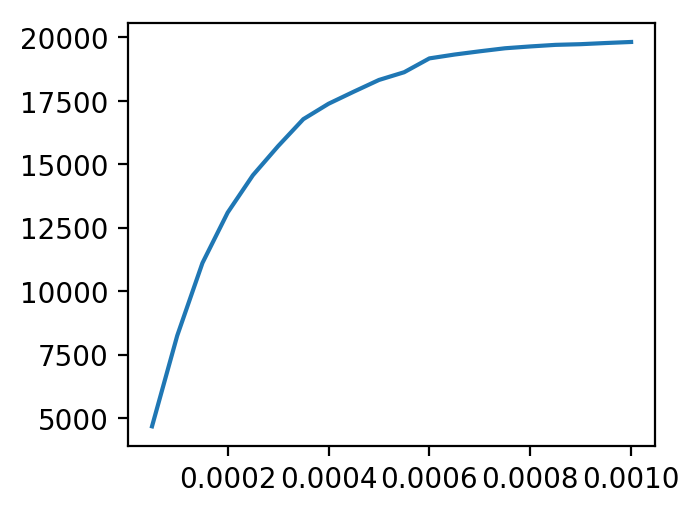

In [10]:
plt.figure(figsize = (3.4,2.8), dpi = 200)
plt.plot(variable,roi, '-')
# plt.semilogy(variable, exp(variable, *popt))
# plt.ylim(0,200)
plt.show()

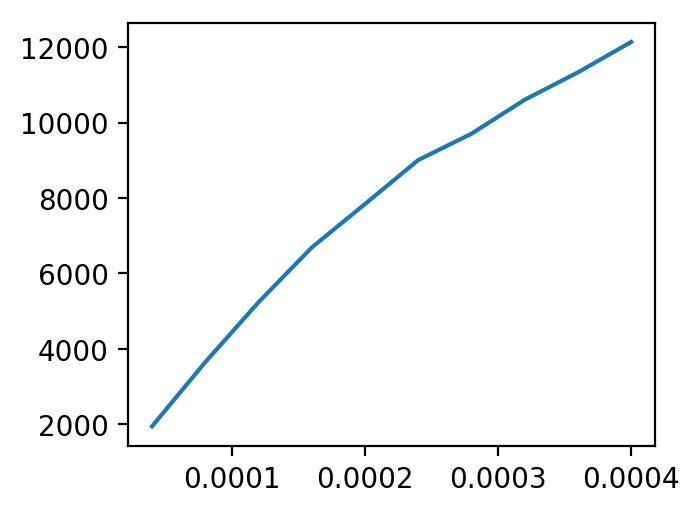

In [2]:
plt.figure(figsize = (3.4,2.8), dpi = 200)
plt.plot(variable,roi, '-')
# plt.semilogy(variable, exp(variable, *popt))
# plt.ylim(0,200)
plt.show()

[2.15858011e+02 3.92391033e-02]
[1.02315057e+01 6.48579209e-03]


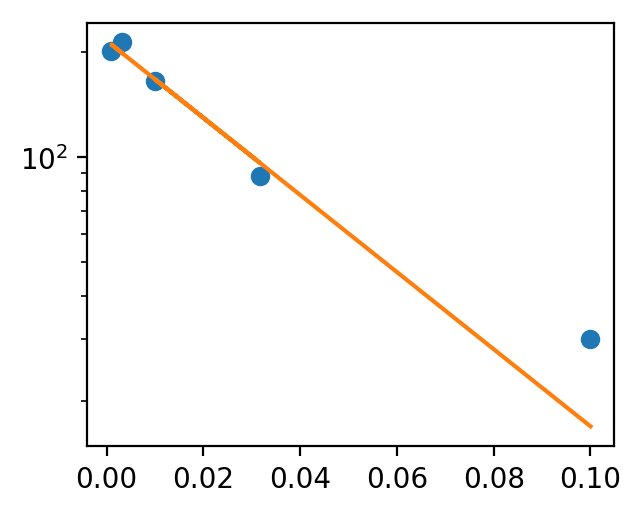

In [56]:
from scipy.optimize import curve_fit
def exp(time, amp, tau):
    return amp * np.exp(-time/tau)

popt, pcov = curve_fit(exp, variable, roi, p0 = [600, 0.04])
fit_errors = np.sqrt(np.diag(pcov))
print (popt)
print (fit_errors)

plt.figure(figsize = (3.4,2.8), dpi = 200)
plt.semilogy(variable,roi, 'o')
plt.semilogy(variable, exp(variable, *popt))
# plt.ylim(0,200)
plt.show()
# scanTimeTagger()
# freeTimeTagger(tagger)
# scanTimeTagger()
# tagger.reset()